# Gender Bias Recruitment - Data Exploration

Este notebook tem como objetivo realizar a **análise exploratória dos dados (EDA)** da base de recrutamento, incluindo a **amostra de fairness**.  
A ideia é compreender as variáveis, identificar possíveis **tendências relacionadas a gênero** e preparar os dados para o treinamento de modelos de Machine Learning.

Antes de iniciar, certifique-se de ter instalado as dependências necessárias usando o comando: 
`pip install -r requirements.txt`

## 1. Importação das bibliotecas
Aqui importamos as principais bibliotecas que serão utilizadas na análise.

Importamos bibliotecas para:
- Interação com o sistema de arquivos (`os`, `sys`)
- Manipulação e análise de dados (`pandas`, `numpy`)
- Visualização (`matplotlib`, `seaborn`)
- Módulos personalizados do `src/` para pré-processamento, treino e fairness
- Configuração do estilo visual com `sns.set(style="whitegrid")`

In [1]:
import sys
import os
sys.path.append(os.path.abspath("../src"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_preprocessing import load_dataset, clean_columns

# Configurações visuais
sns.set(style="whitegrid")

## 2. Carregamento do dataset

Carregamos o CSV `2025-fairness-recruitment-dataset.csv` usando `load_dataset()` e padronizamos as colunas com `clean_columns()`.

In [2]:
df = load_dataset("../data/2025-fairness-recruitment-dataset.csv")
df = clean_columns(df)
df.head()

,mainid_hidden,mod15_hidden,div15_hidden,Age_feature_sensitive,Speed_hidden,Gender_feature_sensitive,Strength_hidden,Speedtest_hidden,Lifttest_hidden,testresult_feature,...,Suitability_target,Value-when-hired_hidden,Candidate-loss-when-nothired_hidden,Should-hire_target,Shouldnothire,hired-by-expert,A1_testresult,A2_testresult_30under,A3_Age_Gender_test,A4_postive-dicr
0,225000,0,0,22,2,male,6,1.0,1.0,2.0,...,4,"10,000",5000,1,0,1,1,1,1,1
1,225001,1,0,26,2,male,6,0.5,1.0,1.5,...,4,"10,000",5000,1,0,1,1,1,1,0
2,225002,2,0,28,1,male,6,1.0,1.0,2.0,...,3,"5,000",5000,1,0,1,1,1,1,1
3,225003,3,0,28,1,male,6,0.5,1.0,1.5,...,3,"5,000",5000,1,0,1,1,1,1,0
4,225004,4,0,32,2,male,6,1.0,1.0,2.0,...,4,"10,000",5000,1,0,1,1,1,1,1


## 3. Estrutura e informações gerais

Aqui analisamos:
- Tipos de dados de cada coluna
- Valores nulos
- Dimensões do dataset

In [3]:
df.info()
print(f"Linhas: {df.shape[0]} | Colunas: {df.shape[1]}")

# Verificação de nulos
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   mainid_hidden                        225 non-null    int64  
 1   mod15_hidden                         225 non-null    int64  
 2   div15_hidden                         225 non-null    int64  
 3   Age_feature_sensitive                225 non-null    int64  
 4   Speed_hidden                         225 non-null    int64  
 5   Gender_feature_sensitive             225 non-null    object 
 6   Strength_hidden                      225 non-null    int64  
 7   Speedtest_hidden                     225 non-null    float64
 8   Lifttest_hidden                      225 non-null    float64
 9   testresult_feature                   225 non-null    float64
 10  livesnear_feature                    225 non-null    int64  
 11  Suitability_target              

mainid_hidden                          0
mod15_hidden                           0
div15_hidden                           0
Age_feature_sensitive                  0
Speed_hidden                           0
Gender_feature_sensitive               0
Strength_hidden                        0
Speedtest_hidden                       0
Lifttest_hidden                        0
testresult_feature                     0
livesnear_feature                      0
Suitability_target                     0
Value-when-hired_hidden                0
Candidate-loss-when-nothired_hidden    0
Should-hire_target                     0
Shouldnothire                          0
hired-by-expert                        0
A1_testresult                          0
A2_testresult_30under                  0
A3_Age_Gender_test                     0
A4_postive-dicr                        0
dtype: int64

## 4. Estatísticas descritivas

Vamos explorar estatísticas básicas como média, mediana e desvio padrão,
para entender a distribuição das variáveis numéricas.

In [4]:
df.describe()

,mainid_hidden,mod15_hidden,div15_hidden,Age_feature_sensitive,Speed_hidden,Strength_hidden,Speedtest_hidden,Lifttest_hidden,testresult_feature,livesnear_feature,Suitability_target,Candidate-loss-when-nothired_hidden,Should-hire_target,Shouldnothire,hired-by-expert,A1_testresult,A2_testresult_30under,A3_Age_Gender_test,A4_postive-dicr
count,225.000000,225.000000,225.000000,225.000000,225.00,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.00,225.000000,225.000000,225.000000,225.000000
mean,225112.000000,7.000000,7.000000,35.817778,0.80,5.200000,0.566667,0.600000,1.166667,0.524444,1.866667,1778.933333,0.333333,0.666667,0.28,0.431111,0.320000,0.337778,0.271111
std,65.096083,4.330127,4.330127,8.494622,0.75,0.834523,0.309810,0.327327,0.450694,0.500516,1.077365,2301.956412,0.472456,0.472456,0.45,0.496336,0.467516,0.474007,0.445524
min,225000.000000,0.000000,0.000000,20.000000,0.00,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
25%,225056.000000,3.000000,3.000000,29.000000,0.00,4.000000,0.500000,0.500000,1.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
50%,225112.000000,7.000000,7.000000,36.000000,1.00,5.000000,0.500000,0.500000,1.000000,1.000000,1.000000,10.000000,0.000000,1.000000,0.00,0.000000,0.000000,0.000000,0.000000
75%,225168.000000,11.000000,11.000000,43.000000,1.00,6.000000,1.000000,1.000000,1.500000,1.000000,3.000000,5000.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000
max,225224.000000,14.000000,14.000000,49.000000,2.00,6.000000,1.000000,1.000000,2.000000,1.000000,4.000000,5000.000000,1.000000,1.000000,1.00,1.000000,1.000000,1.000000,1.000000


## 5. Distribuição de gênero

Uma das primeiras etapas é verificar o **equilíbrio entre candidatos do gênero masculino e feminino** no dataset.

Gender_feature_sensitive
male      150
female     75
Name: count, dtype: int64


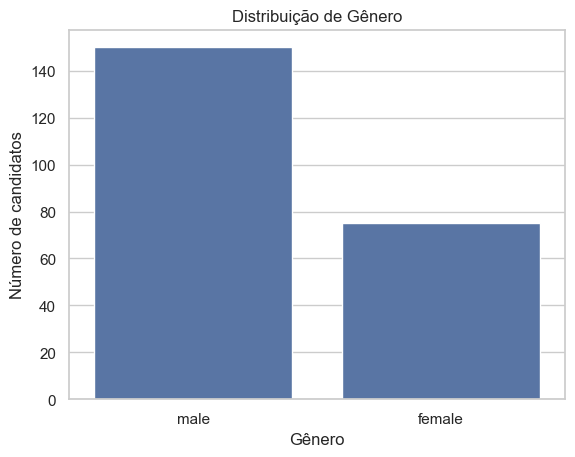

In [5]:
gender_counts = df["Gender_feature_sensitive"].value_counts()
print(gender_counts)

sns.countplot(x="Gender_feature_sensitive", data=df)
plt.title("Distribuição de Gênero")
plt.xlabel("Gênero")
plt.ylabel("Número de candidatos")
plt.show()

## 6. Correlação entre variáveis numéricas

Visualizar a correlação ajuda a identificar quais atributos podem estar mais relacionados
à decisão de contratação (`Should-hire(target)`).

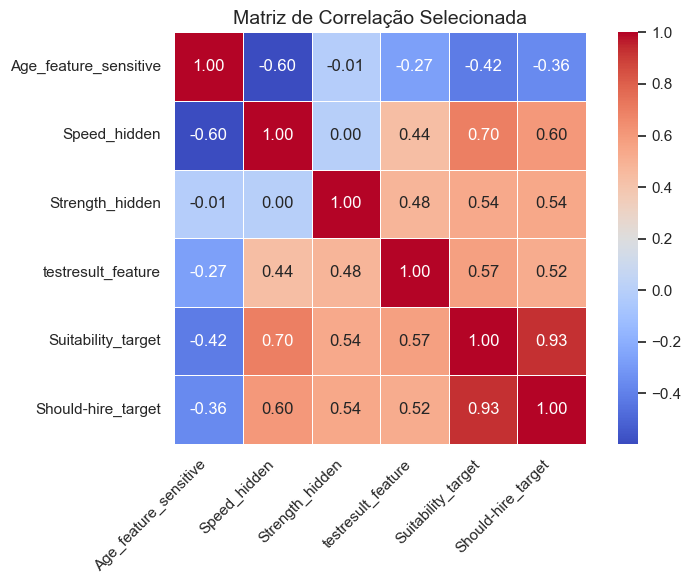

In [6]:
cols = [
    "Age_feature_sensitive", 
    "Speed_hidden", 
    "Strength_hidden", 
    "testresult_feature", 
    "Suitability_target", 
    "Should-hire_target"
]
corr = df[cols].corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Matriz de Correlação Selecionada", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 7. Análise da variável-alvo (`Should-hire(target)`)

Vamos verificar como estão distribuídas as decisões de contratação.

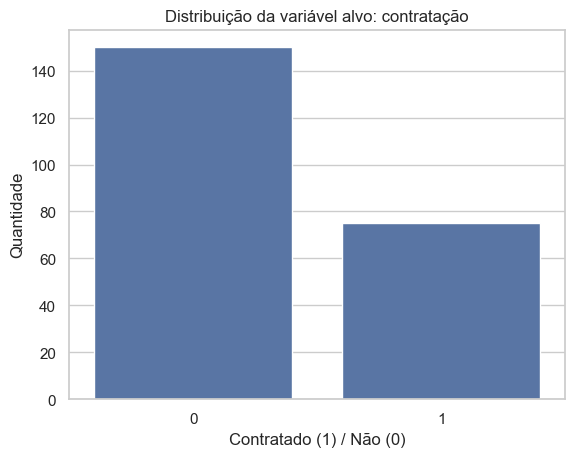

In [7]:
sns.countplot(x="Should-hire_target", data=df)
plt.title("Distribuição da variável alvo: contratação")
plt.xlabel("Contratado (1) / Não (0)")
plt.ylabel("Quantidade")
plt.show()

## 8. Relação entre Gênero e Contratação

Nesta seção, analisamos como o gênero dos candidatos impacta nas decisões de contratação.

- Primeiro, visualizamos a **distribuição absoluta** de candidatos contratados e não contratados por gênero.
- Em seguida, calculamos a **taxa percentual de contratação** para cada gênero, destacando possíveis desigualdades.

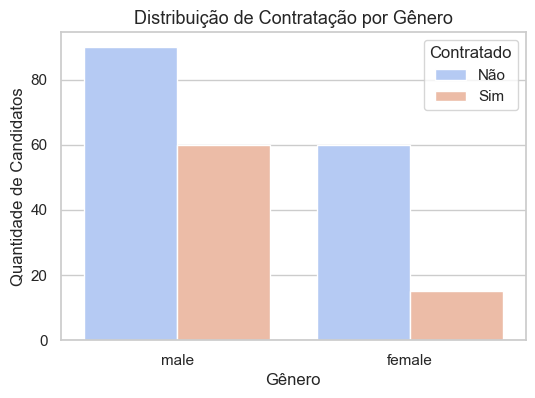

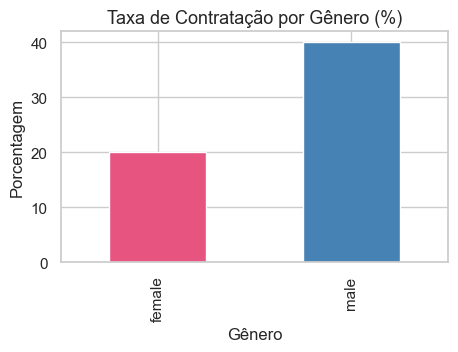

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender_feature_sensitive", hue="Should-hire_target", palette="coolwarm")
plt.title("Distribuição de Contratação por Gênero", fontsize=13)
plt.xlabel("Gênero")
plt.ylabel("Quantidade de Candidatos")
plt.legend(title="Contratado", labels=["Não", "Sim"])
plt.show()

hire_rate = df.groupby("Gender_feature_sensitive")["Should-hire_target"].mean() * 100
hire_rate.plot(kind="bar", color=["#E75480", "#4682B4"], figsize=(5,3))
plt.title("Taxa de Contratação por Gênero (%)", fontsize=13)
plt.ylabel("Porcentagem")
plt.xlabel("Gênero")
plt.show()

## 9. Conclusões parciais

- Observamos a distribuição geral dos dados.  
- Avaliamos o equilíbrio entre gêneros.  
- Identificamos possíveis tendências na taxa de contratação.  

Na próxima etapa, os dados serão preparados (limpeza, codificação e balanceamento)  
para o treinamento de modelos de **Machine Learning** que ajudarão a detectar possíveis vieses de gênero.